# Connecter le drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


| **Colonne**                          | **Description**                                                                                   |
|--------------------------------------|---------------------------------------------------------------------------------------------------|
| **Booking_ID**                       | Identifiant unique de chaque réservation.                                                        |
| **no_of_adults**                     | Nombre d'adultes.                                                                                |
| **no_of_children**                   | Nombre d'enfants.                                                                                |
| **no_of_weekend_nights**             | Nombre de nuits passées ou réservées le week-end (samedi ou dimanche).                           |
| **no_of_week_nights**                | Nombre de nuits passées ou réservées en semaine (du lundi au vendredi).                          |
| **type_of_meal_plan**                | Type de plan de repas réservé par le client.                                                     |
| **required_car_parking_space**       | Le client a-t-il besoin d'une place de parking ? (0 - Non, 1 - Oui).                             |
| **room_type_reserved**               | Type de chambre réservée par le client. Les valeurs sont chiffrées par INN Hotels.               |
| **lead_time**                        | Nombre de jours entre la date de réservation et la date d'arrivée.                               |
| **arrival_year**                     | Année de la date d'arrivée.                                                                      |
| **arrival_month**                    | Mois de la date d'arrivée.                                                                       |
| **arrival_date**                     | Jour du mois de la date d'arrivée.                                                               |
| **market_segment_type**              | Segment de marché désigné.                                                                       |
| **repeated_guest**                   | Le client est-il un client répété ? (0 - Non, 1 - Oui).                                          |
| **no_of_previous_cancellations**     | Nombre de réservations précédentes annulées par le client avant la réservation actuelle.         |
| **no_of_previous_bookings_not_canceled** | Nombre de réservations précédentes non annulées par le client avant la réservation actuelle. |
| **avg_price_per_room**               | Prix moyen par jour de la réservation ; les prix des chambres sont dynamiques (en euros).        |
| **no_of_special_requests**           | Nombre total de demandes spéciales faites par le client (par exemple, étage élevé, vue, etc.).   |
| **booking_status**                   | Indicateur indiquant si la réservation a été annulée ou non.                                     |

In [21]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1zmaejIsfcXLtyIWSBduU9ye6pYQ-hnHMjCymyxilhRA#gid=0


# **1. Importer les bibliothèques**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# **2. Importer la base de donnée**

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Revenue Management/Hotel Reservations.csv")

In [9]:
print(data.shape)
print(data.columns)
print(data.info())

(36275, 19)
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   

In [10]:
data.isnull().sum()/len(data)

,0
Booking_ID,0.0
no_of_adults,0.0
no_of_children,0.0
no_of_weekend_nights,0.0
no_of_week_nights,0.0
type_of_meal_plan,0.0
required_car_parking_space,0.0
room_type_reserved,0.0
lead_time,0.0
arrival_year,0.0


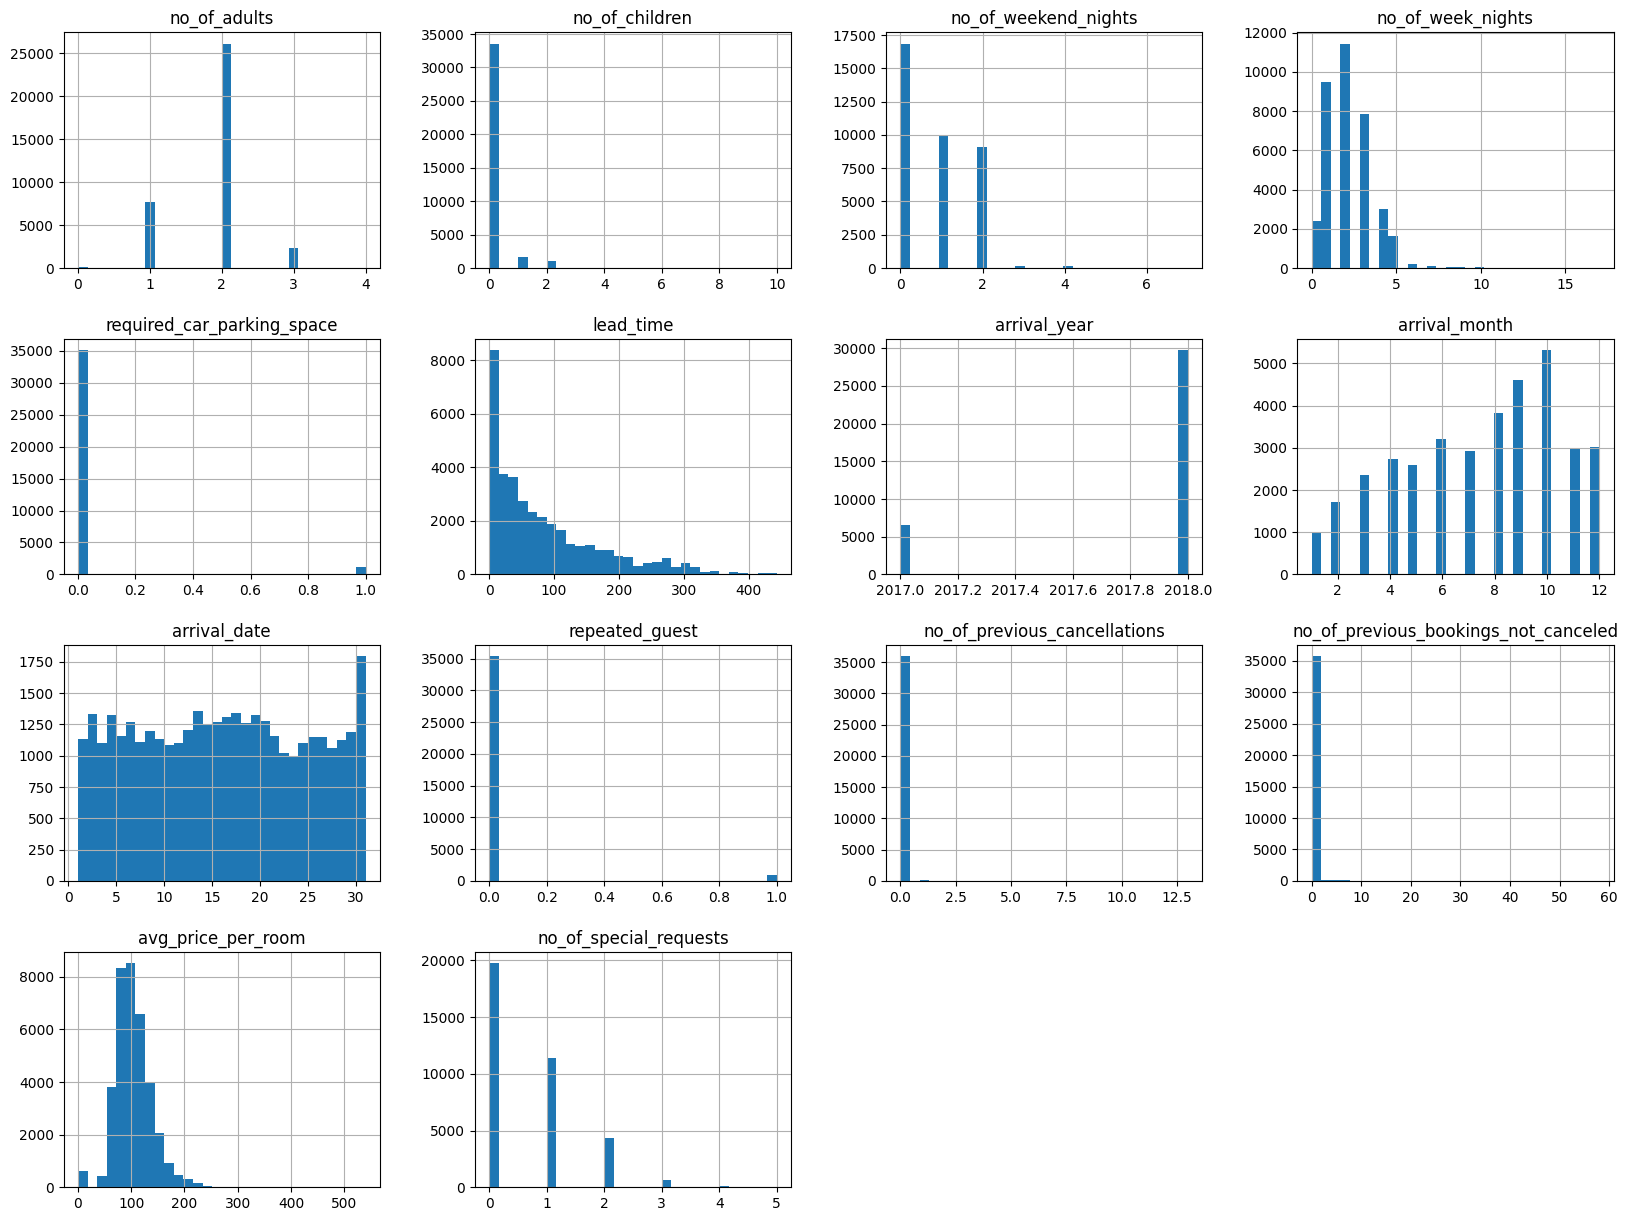

In [11]:
# Histogrammes pour les variables numériques
data.hist(figsize=(20, 15), bins=30)
plt.show()

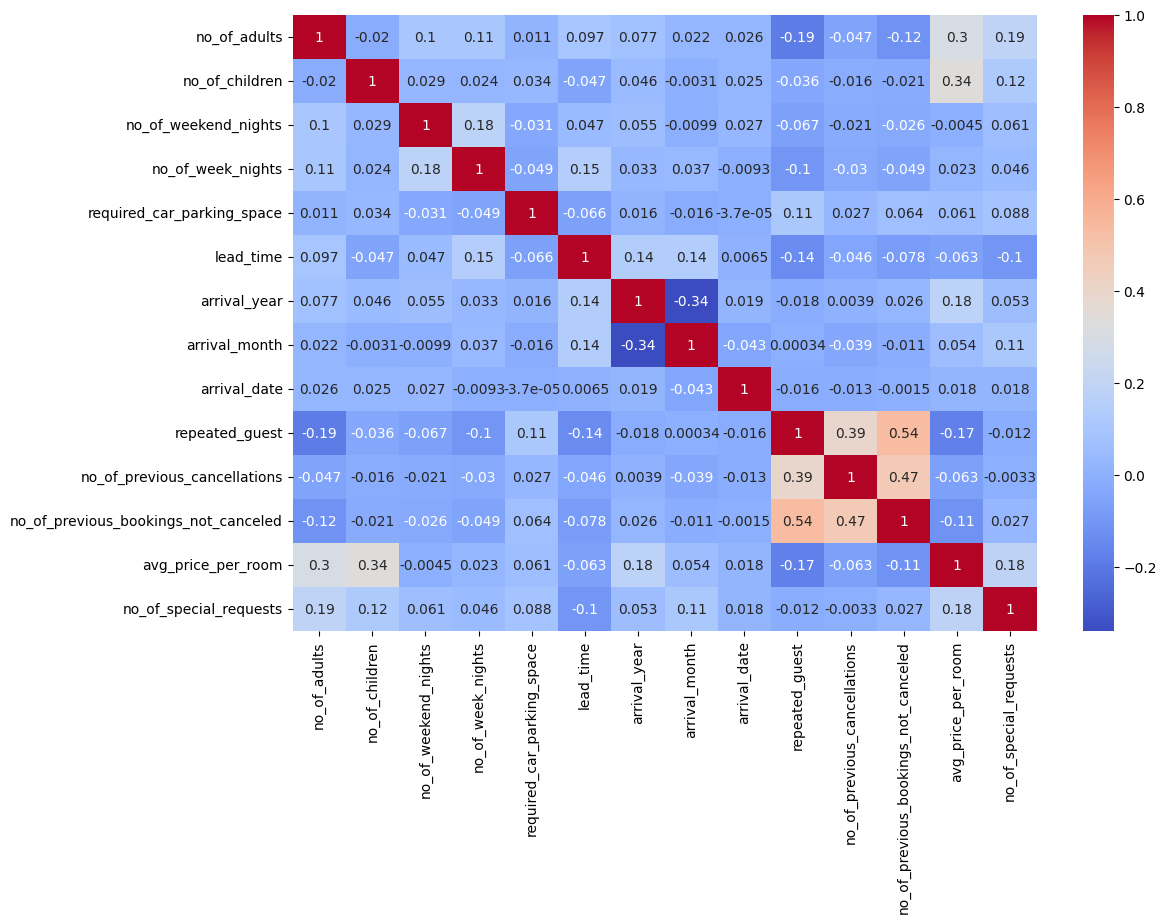

In [12]:
# Matrice de corrélation
corr_matrix = data.select_dtypes(include=['number']).corr() # Only include numerical features for correlation calculation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **3. Préparation des données**

### le nombre d'Annulation par les différentes colonnes

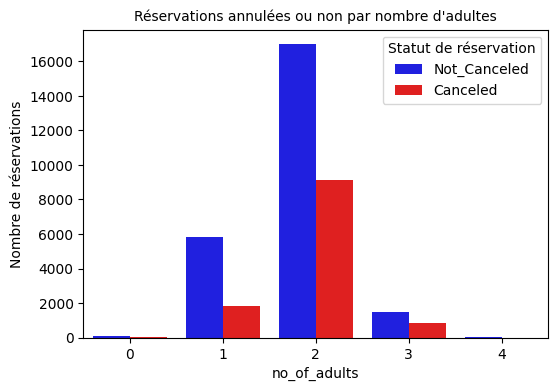

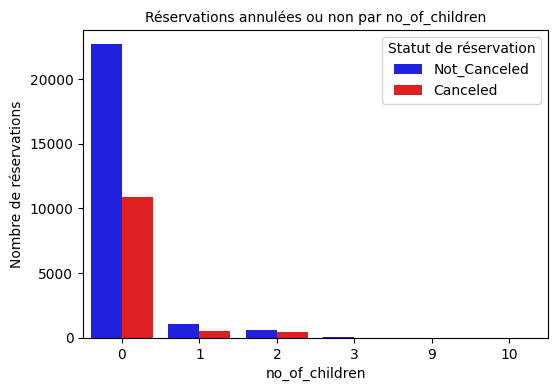

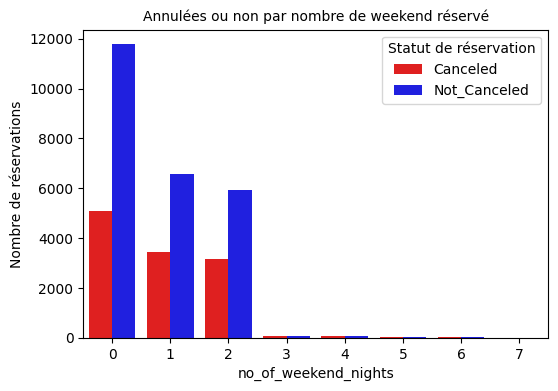

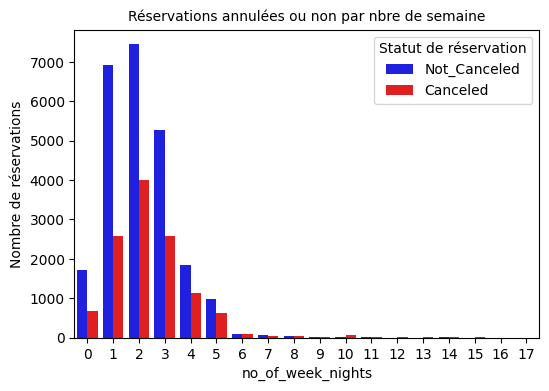

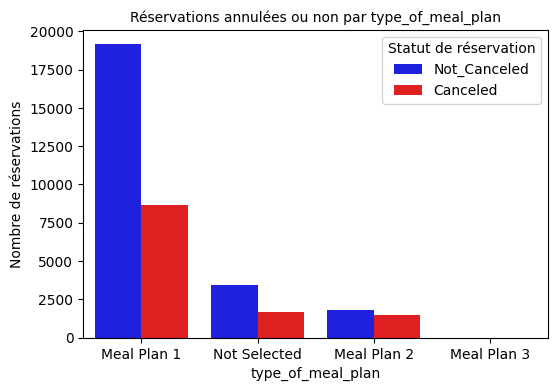

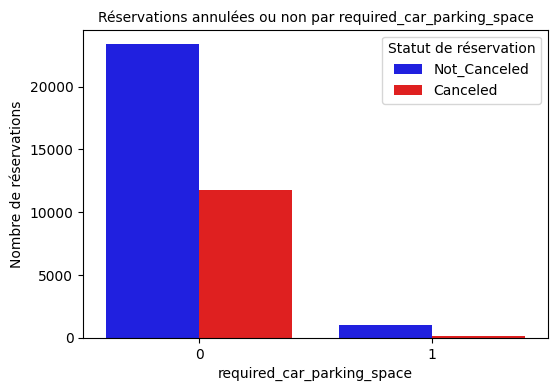

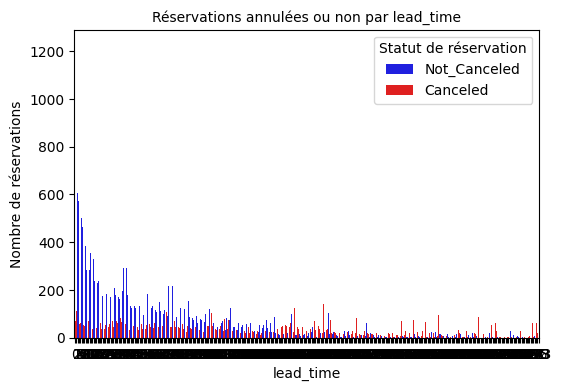

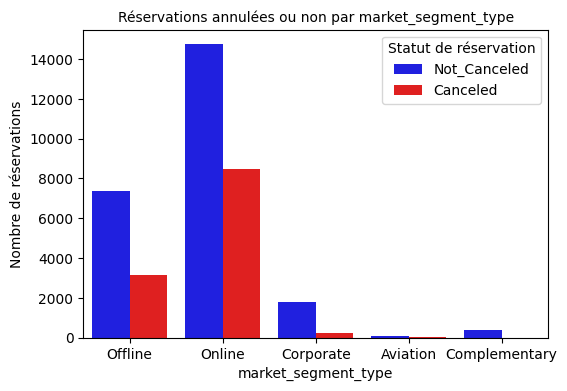

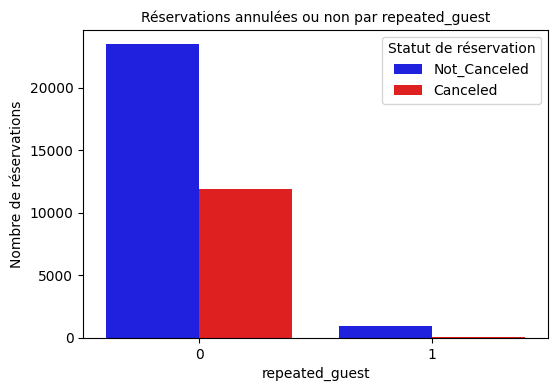

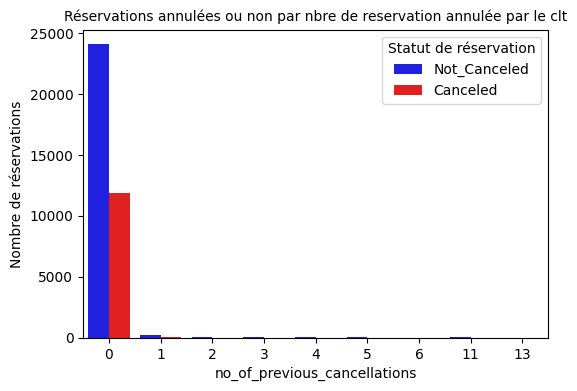

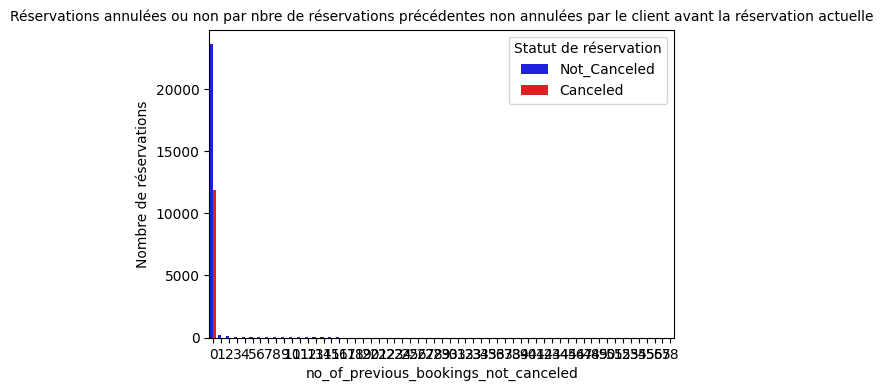

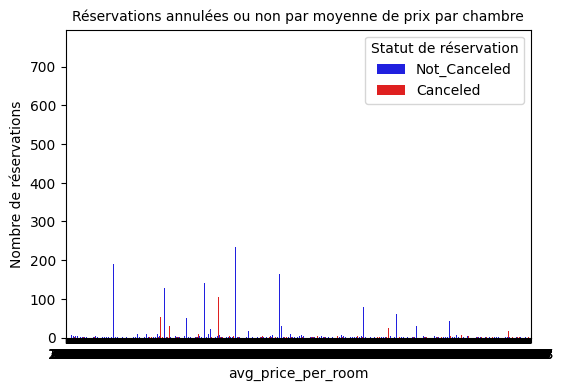

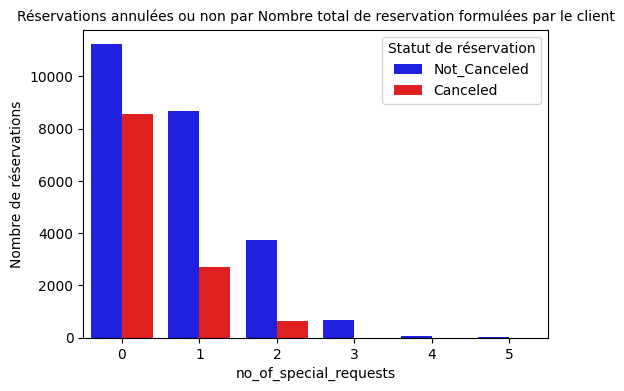

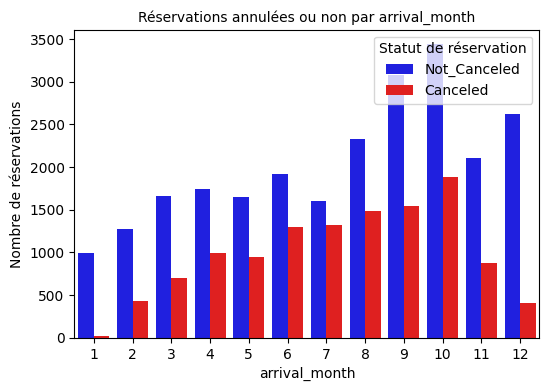

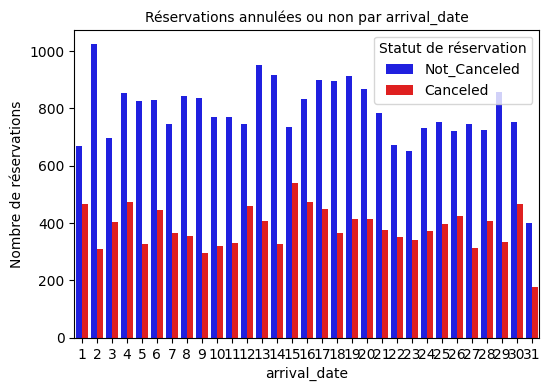

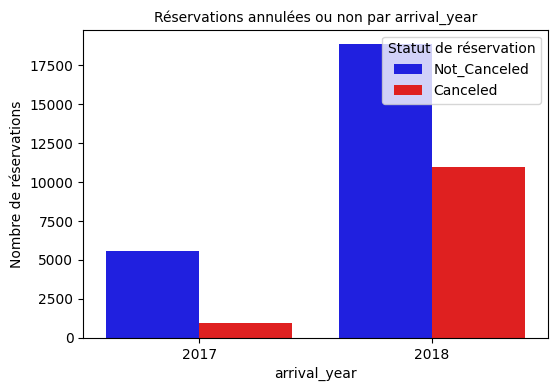

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables à analyser
variables = [
    ("no_of_adults", "Réservations annulées ou non par nombre d'adultes"),
    ("no_of_children", "Réservations annulées ou non par no_of_children"),
    ("no_of_weekend_nights", "Annulées ou non par nombre de weekend réservé"),
    ("no_of_week_nights", "Réservations annulées ou non par nbre de semaine"),
    ("type_of_meal_plan", "Réservations annulées ou non par type_of_meal_plan"),
    ("required_car_parking_space", "Réservations annulées ou non par required_car_parking_space"),
    ("lead_time", "Réservations annulées ou non par lead_time"),
    ("market_segment_type", "Réservations annulées ou non par market_segment_type"),
    ("repeated_guest", "Réservations annulées ou non par repeated_guest"),
    ("no_of_previous_cancellations", "Réservations annulées ou non par nbre de reservation annulée par le clt"),
    ("no_of_previous_bookings_not_canceled", "Réservations annulées ou non par nbre de réservations précédentes non annulées par le client avant la réservation actuelle"),
    ("avg_price_per_room", "Réservations annulées ou non par moyenne de prix par chambre"),
    ("no_of_special_requests", "Réservations annulées ou non par Nombre total de reservation formulées par le client"),
    ("arrival_month", "Réservations annulées ou non par arrival_month"),
    ("arrival_date", "Réservations annulées ou non par arrival_date"),
    ("arrival_year", "Réservations annulées ou non par arrival_year")
]

# Dictionnaire de couleurs pour 'Canceled' et 'Not_Canceled'
color_dict = {'Canceled': 'red', 'Not_Canceled': 'blue'}

# Créer une boucle pour générer les graphiques
for var, title in variables:
    plt.figure(figsize=(6, 4))
    plt.title(title, fontdict={'fontsize': 10})

    # Créer le graphique avec les couleurs personnalisées
    ax = sns.countplot(x=var, hue="booking_status", data=data, palette=color_dict)

    # Ajouter les labels
    plt.xlabel(var)
    plt.ylabel("Nombre de réservations")

    # Ajouter la légende
    plt.legend(title="Statut de réservation", loc='upper right')

    # Afficher le graphique
    plt.show()


In [14]:
print('adult',  data[ 'no_of_adults'].unique())
print('children',  data['no_of_children'].unique())
print('3weekend',  data['no_of_weekend_nights'].unique())
print('week',  data['no_of_week_nights'].unique())
print('meal',  data['type_of_meal_plan'].unique())
print('parking',  data['required_car_parking_space'].unique())
print('room',  data['room_type_reserved'].unique())
print('lead time',  data['lead_time'].unique())
print('année',  data['arrival_year'].unique())
print('mois', data['arrival_month'].unique())
print("date d'arrivée", data['arrival_date'].unique())
print('segment', data['market_segment_type'].unique())
print('repeated', data['repeated_guest'].unique())
print('nbre booking annulé', data['no_of_previous_bookings_not_canceled'].unique())
print('avg price per room', data['avg_price_per_room'].unique())
print('target', data['booking_status'].unique())


adult [2 1 3 0 4]
children [ 0  2  1  3 10  9]
3weekend [1 2 0 4 3 6 5 7]
week [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
meal ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
parking [0 1]
room ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead time [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 119  59  78 335 103  70  76 144  49  77  36  79  21  33 164
 152  43 102  71 209  93  53 302 239  45 167 113  84   9 166 174  61 151
  52  67 282  

### Make Each Features' Graph

In [15]:
def make_bar_graph(feature):
    if type(data[str(feature)].value_counts().index[0]) == str:
        x = data[str(feature)].value_counts().index
        y = data[str(feature)].value_counts().values
    else:
        x = data[str(feature)].value_counts().sort_index().index
        y = data[str(feature)].value_counts().sort_index().values
    plt.figure(figsize=(20,8))
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 9)
    plt.title(str(feature))
    if len(x) <= 2:
        return plt.bar(x,y,color='#C3EBE3')
    elif len(x) > 2:
        return plt.plot(x,y,color='#C3EBE3')

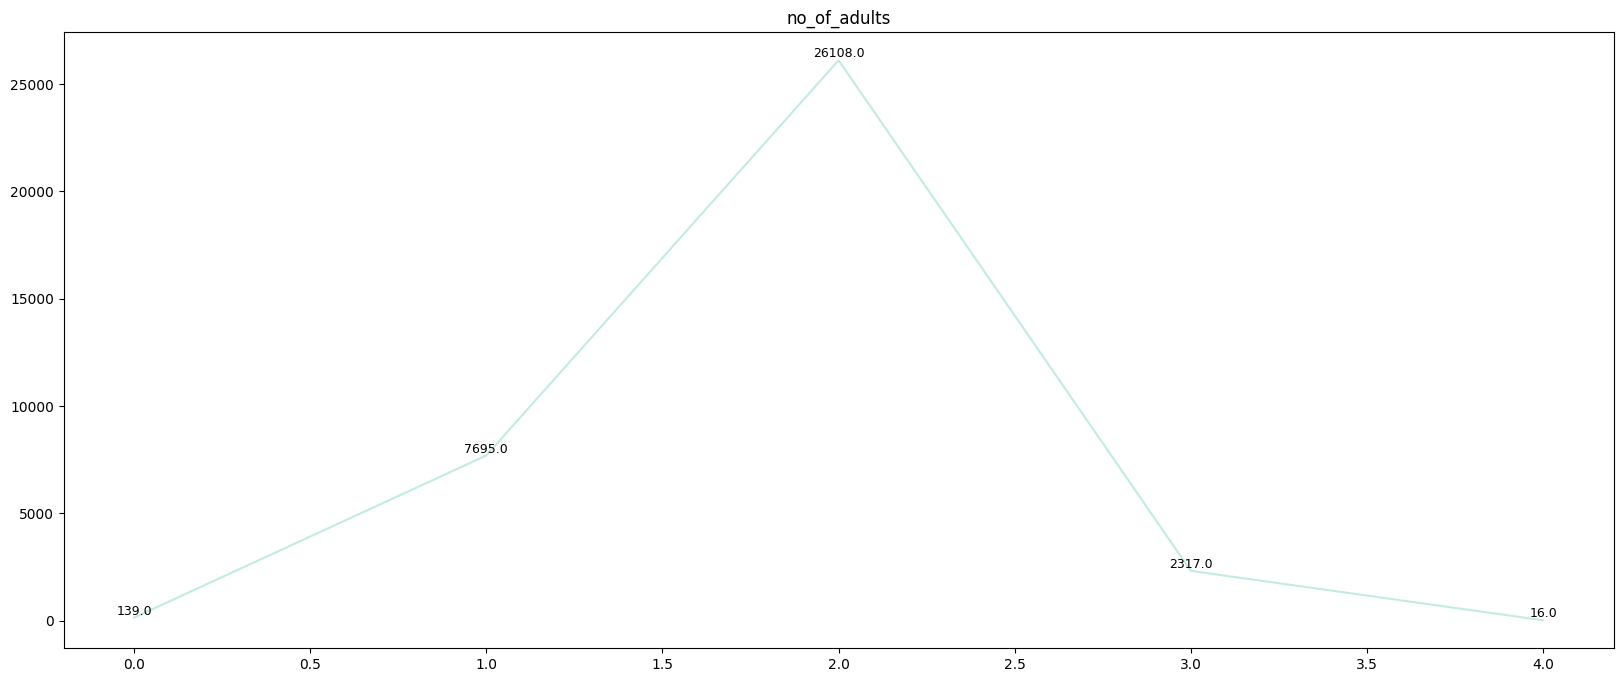

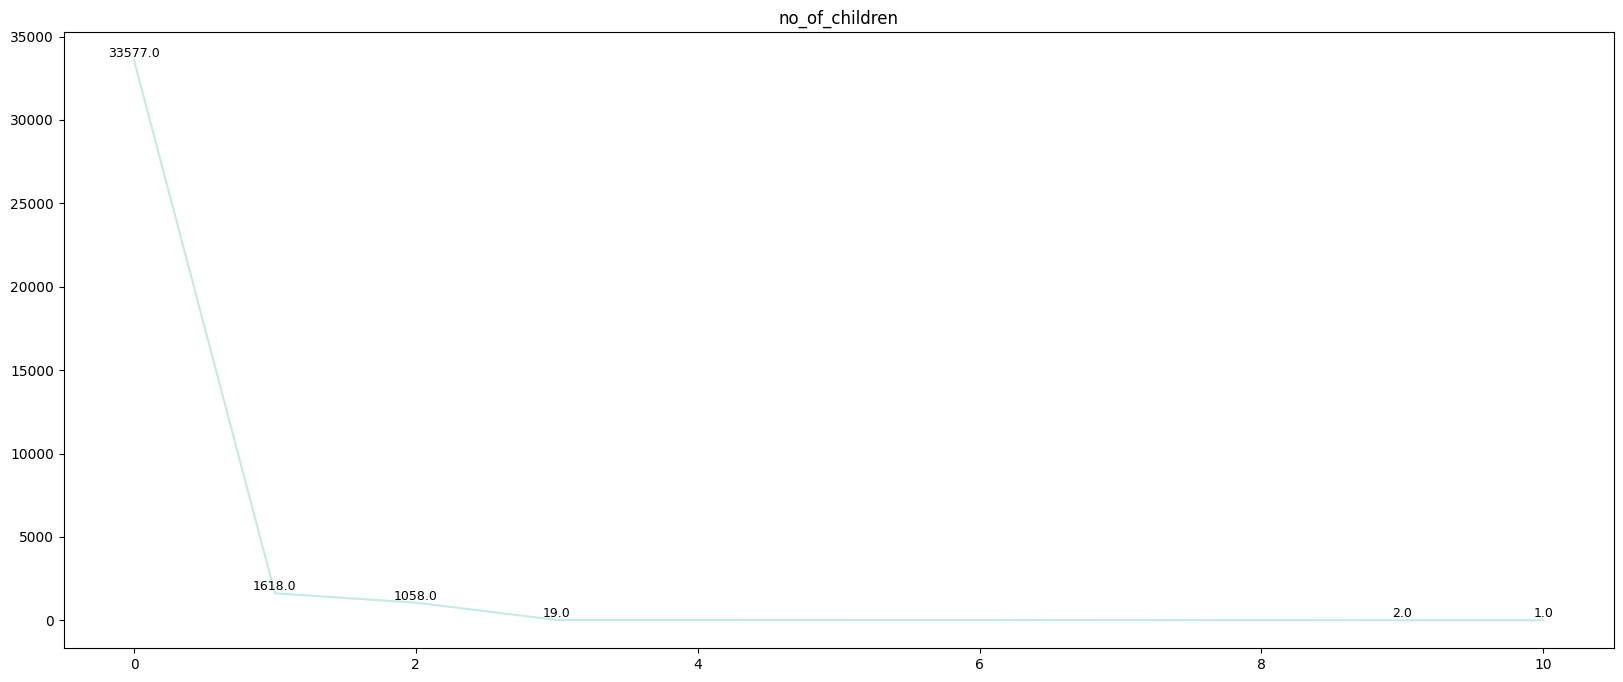

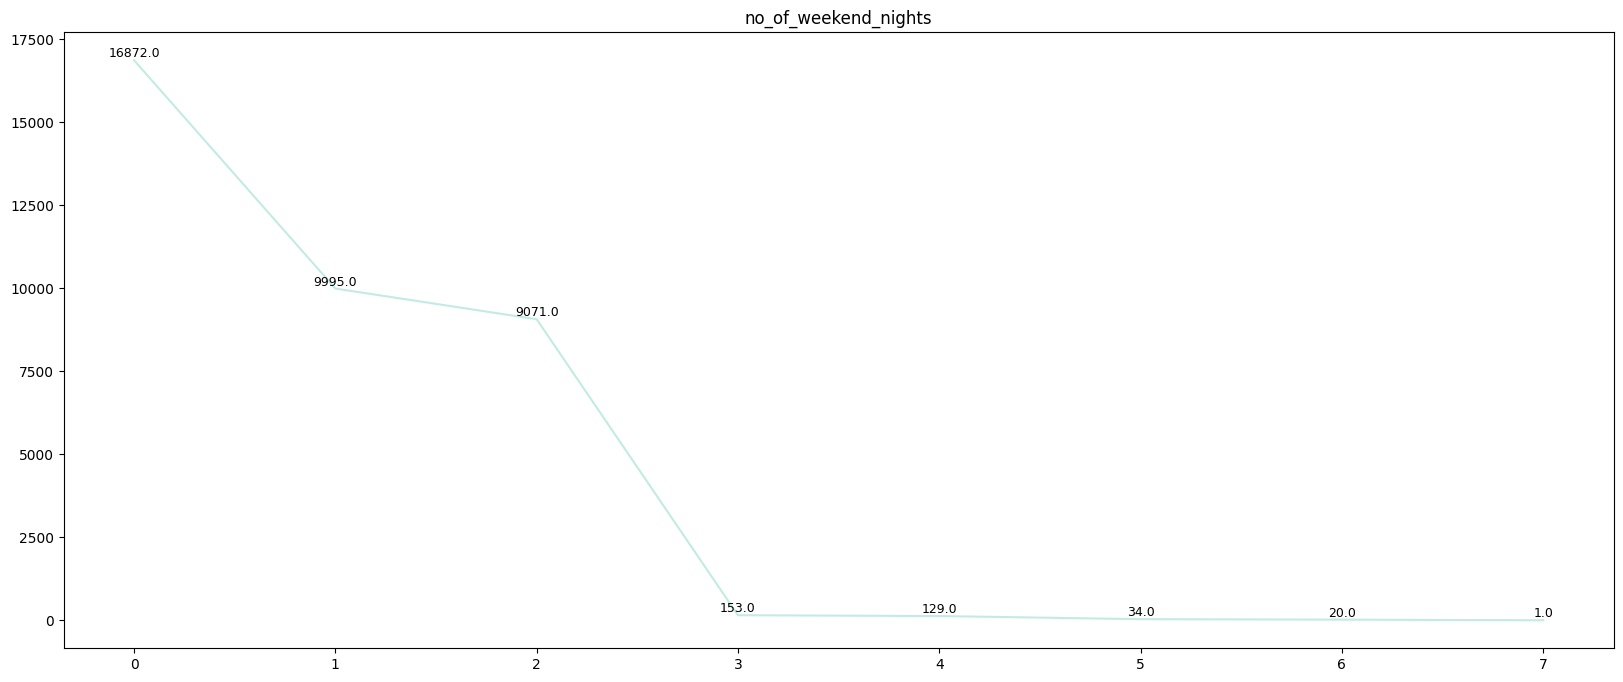

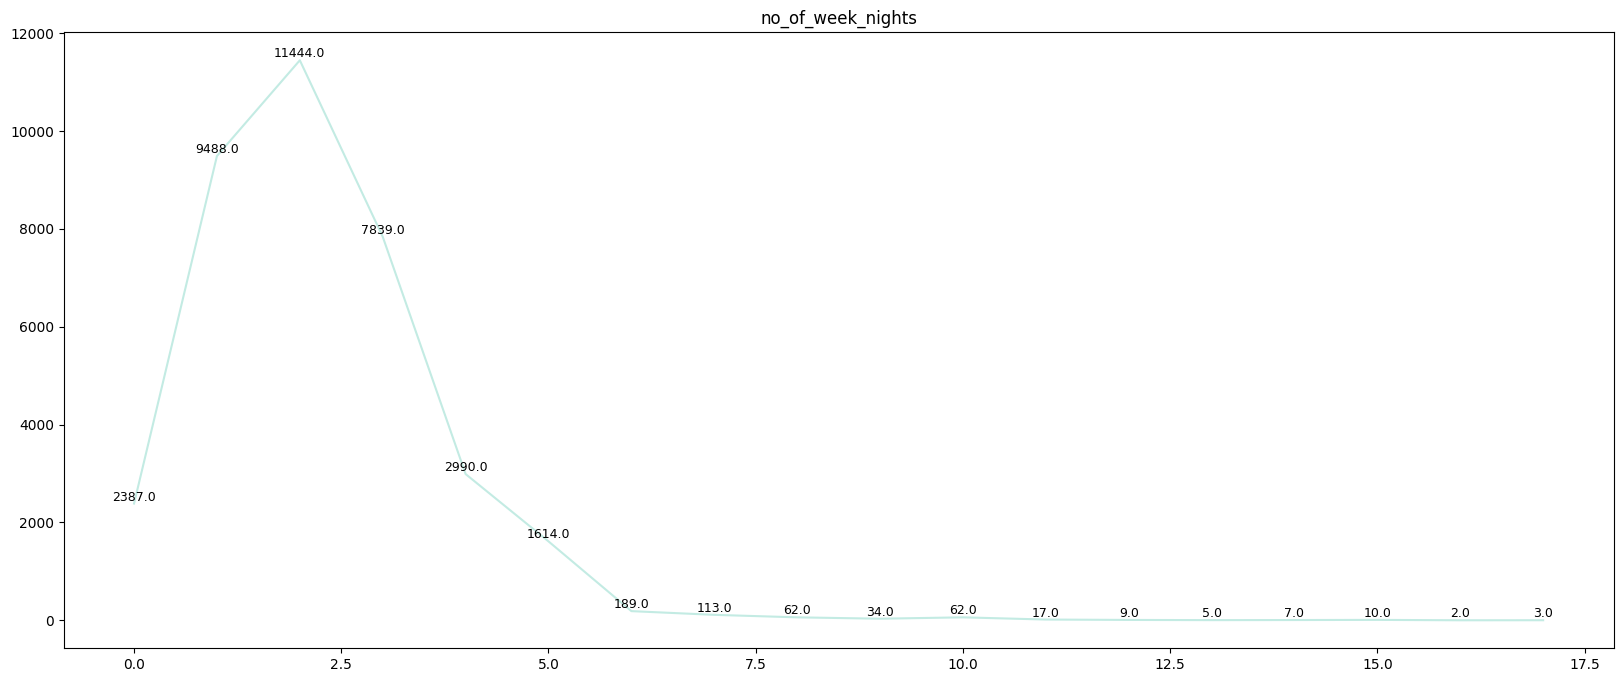

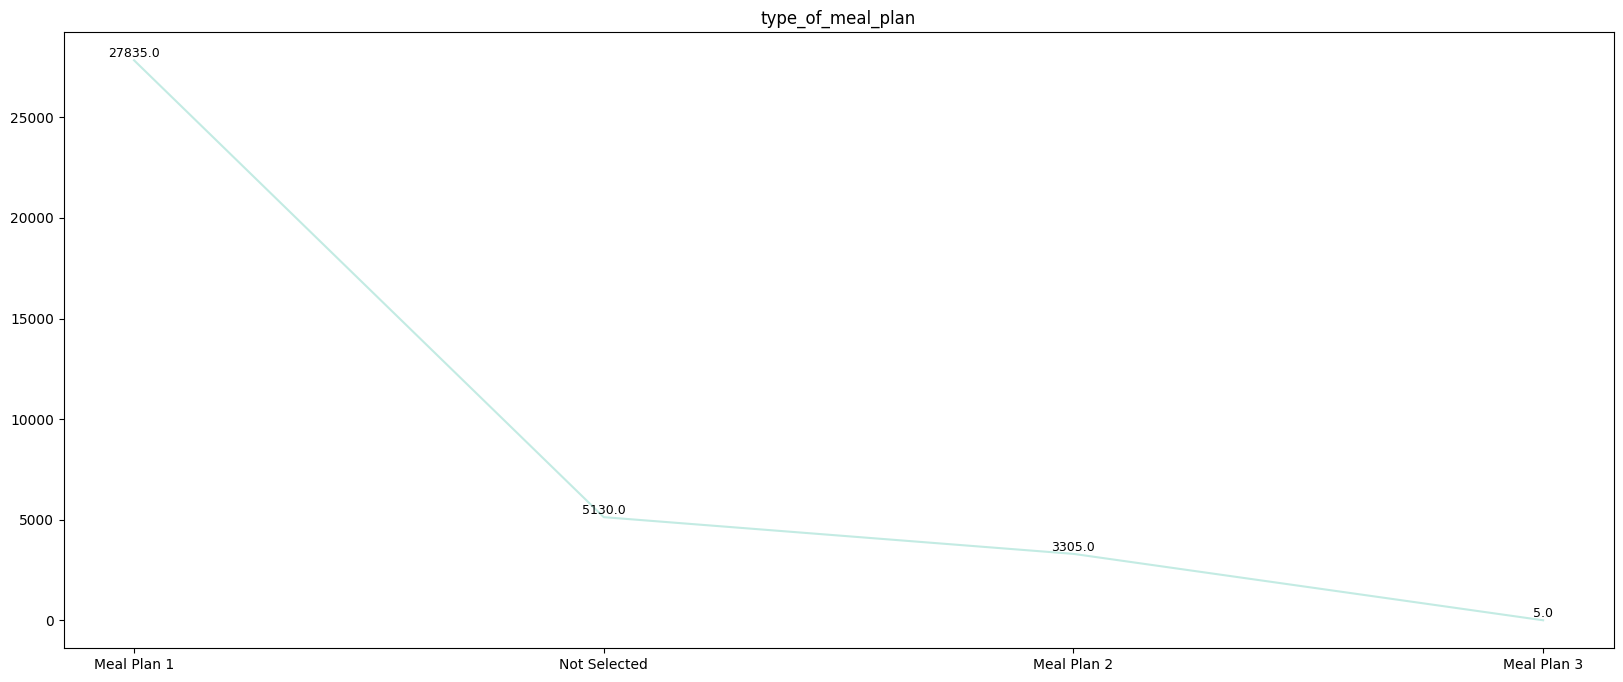

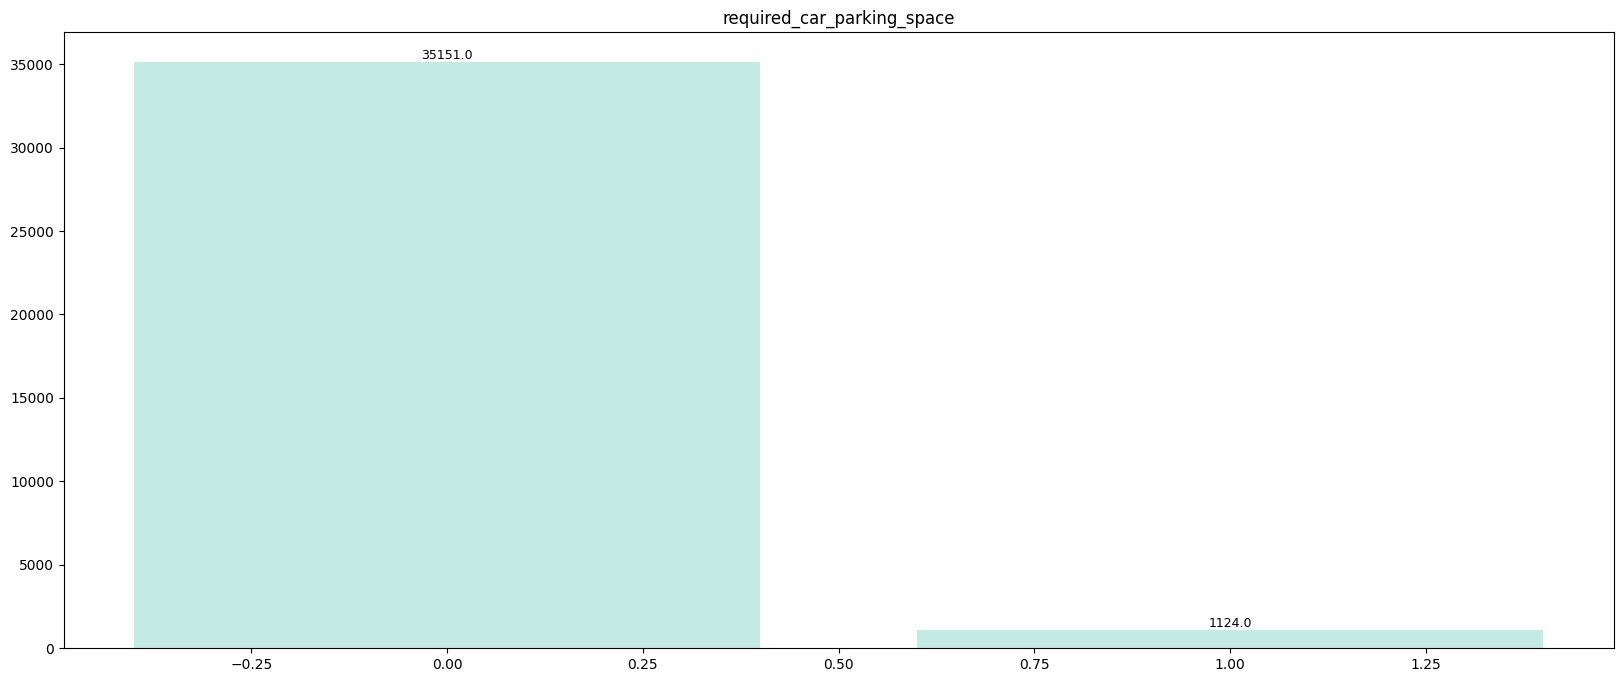

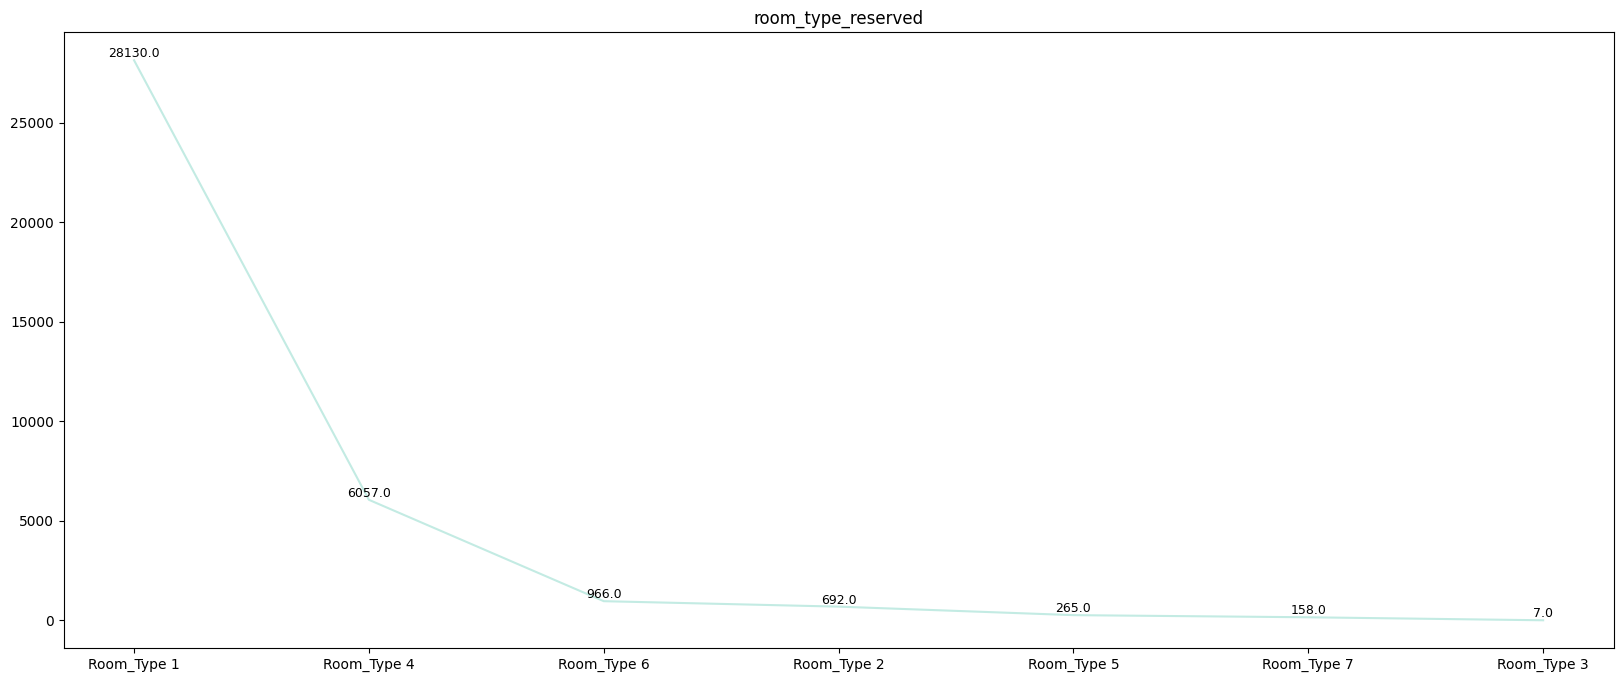

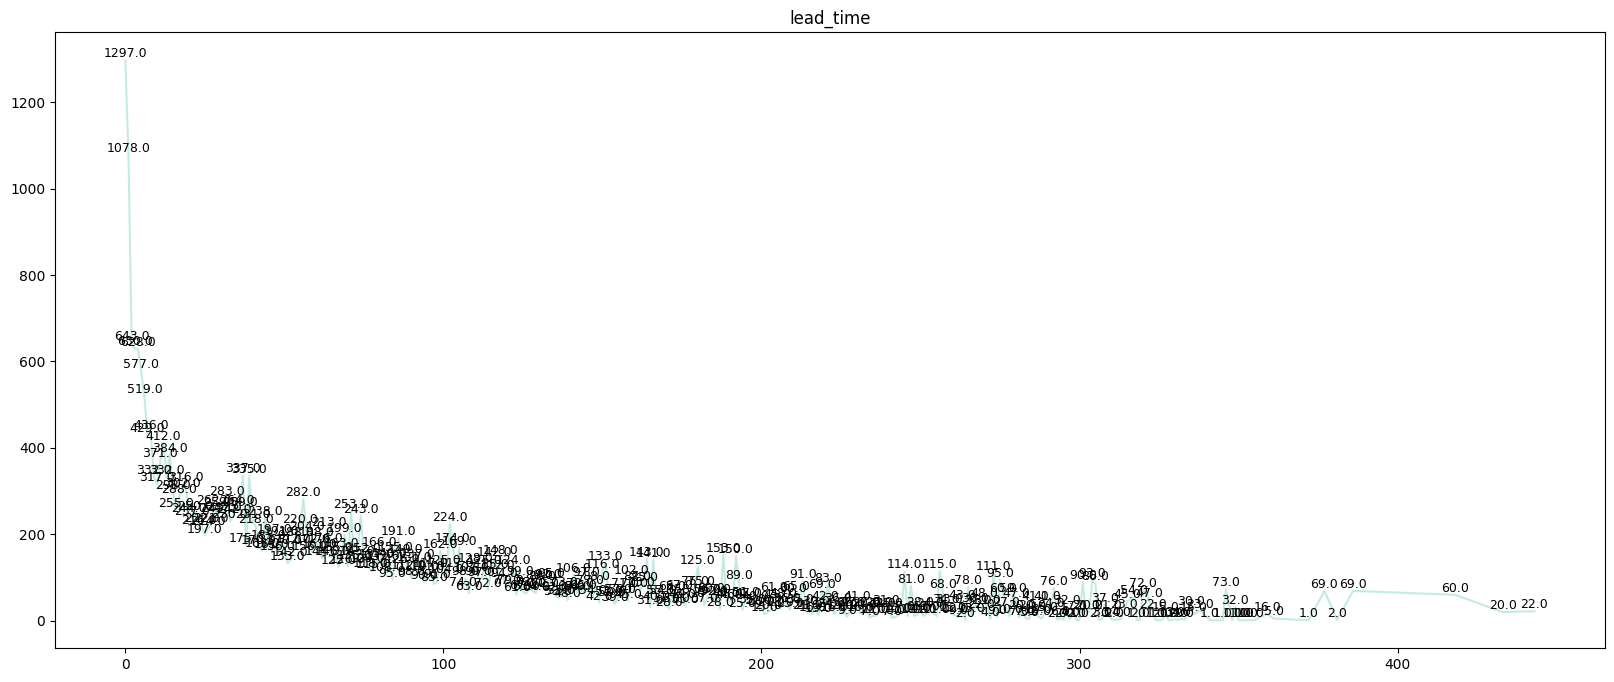

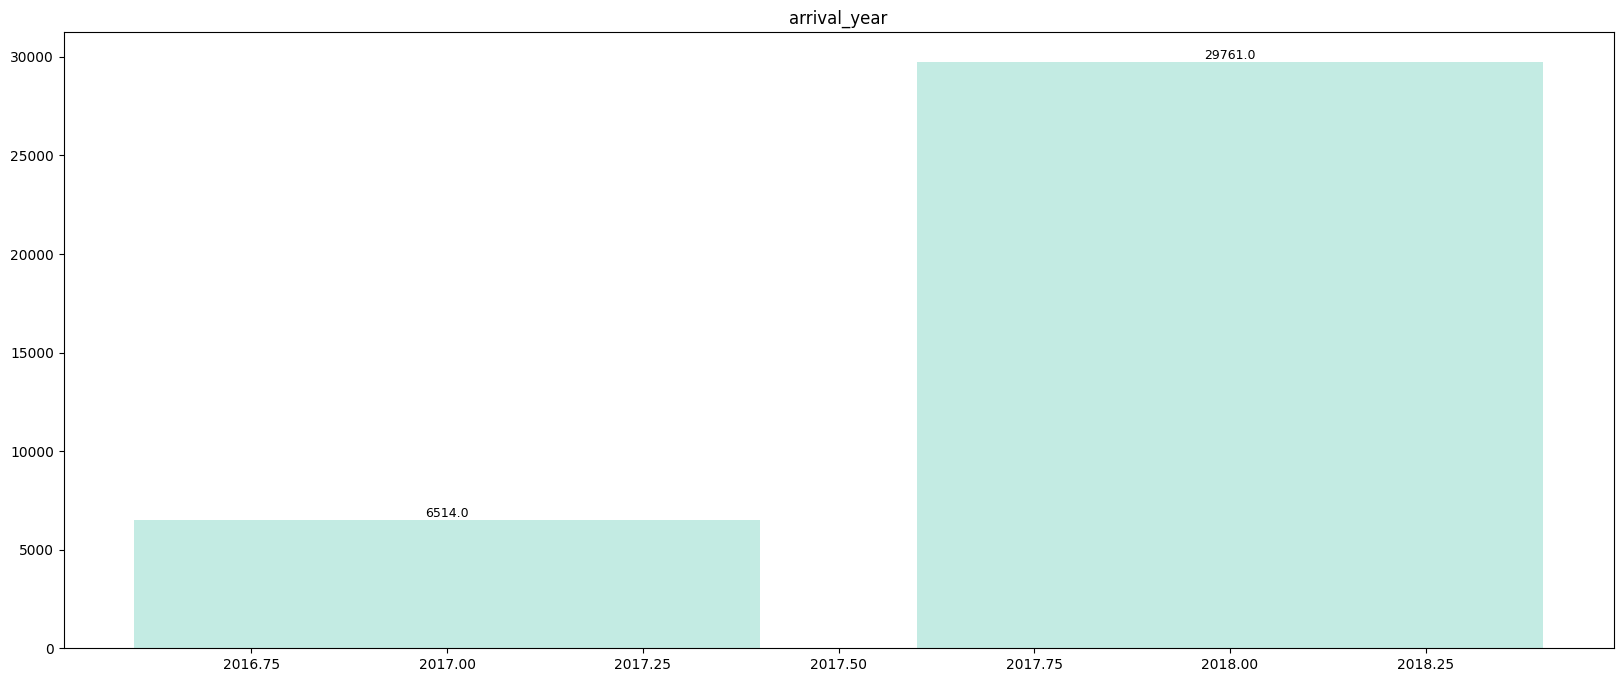

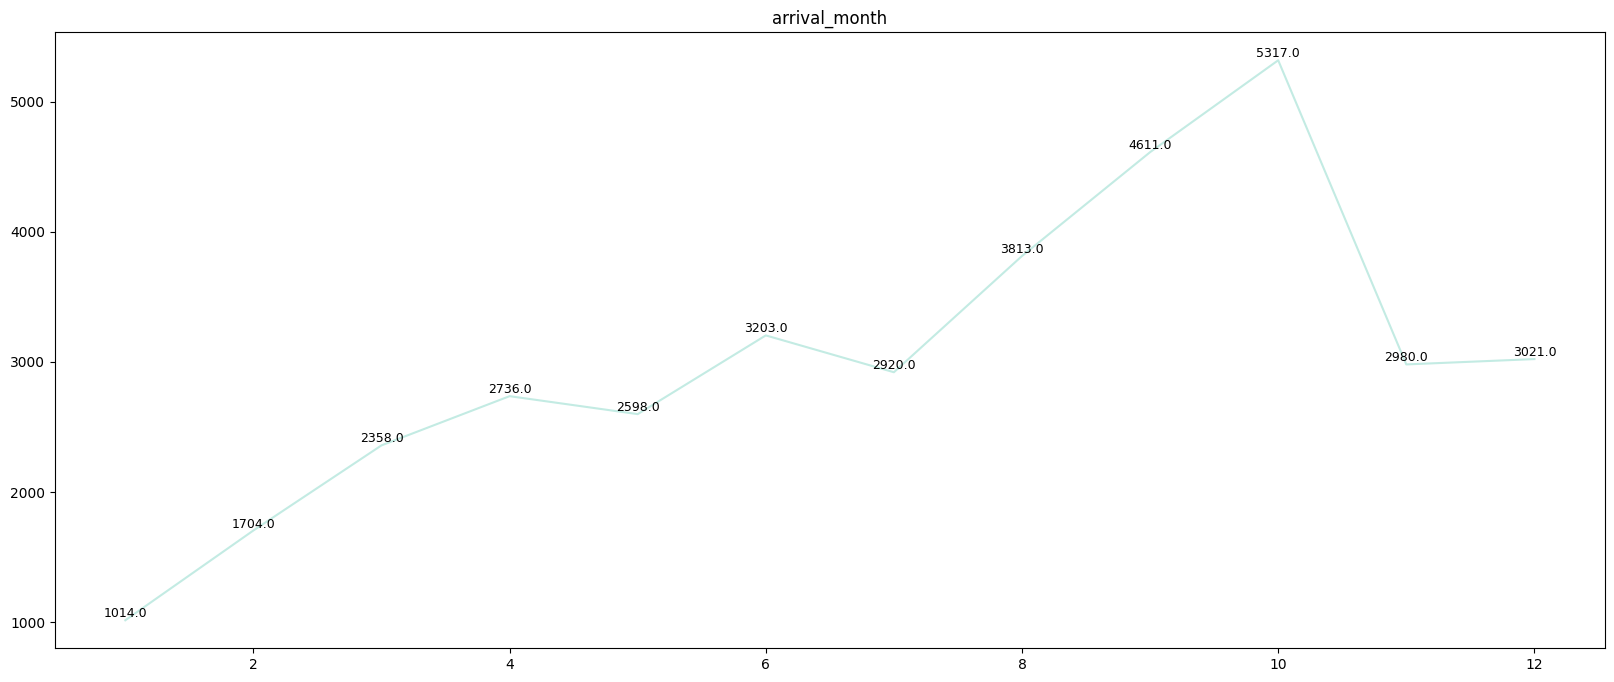

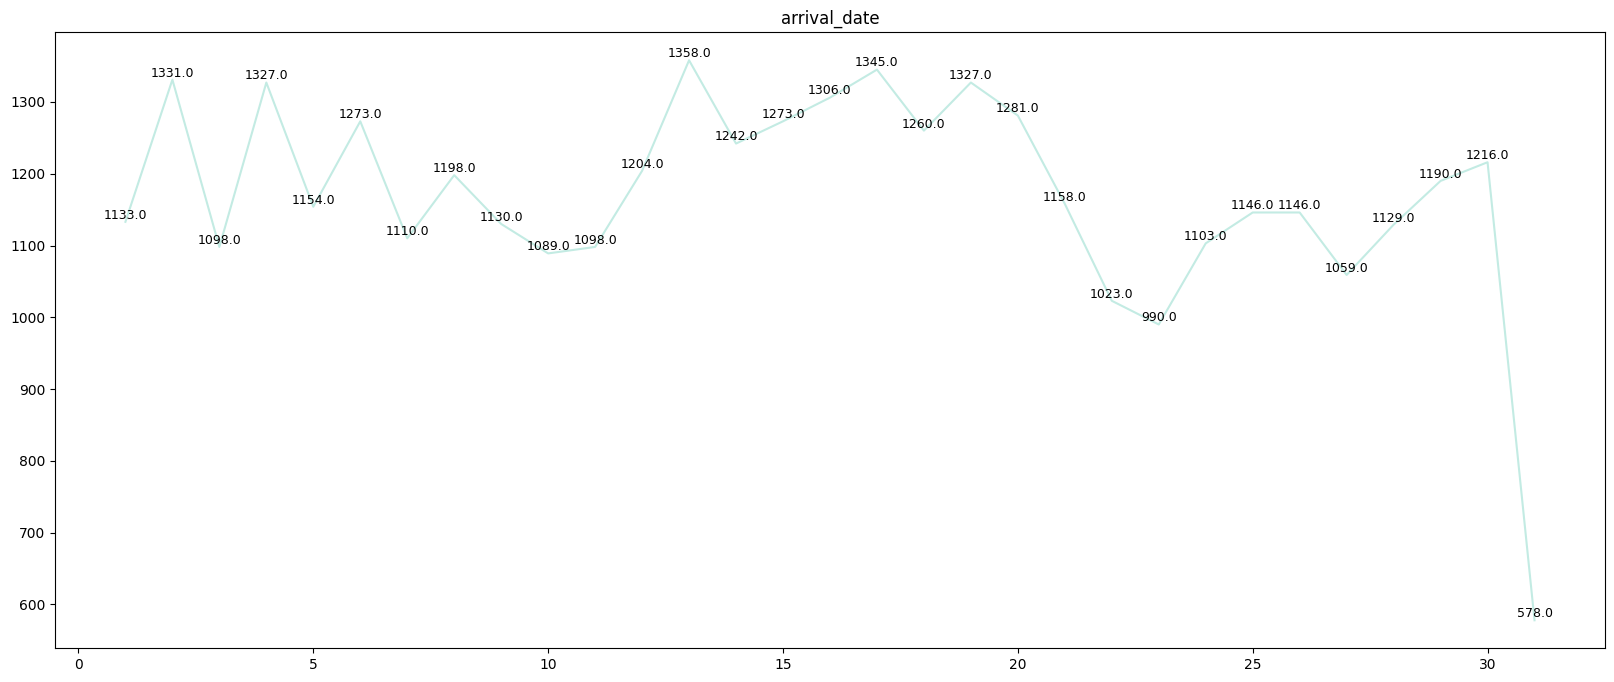

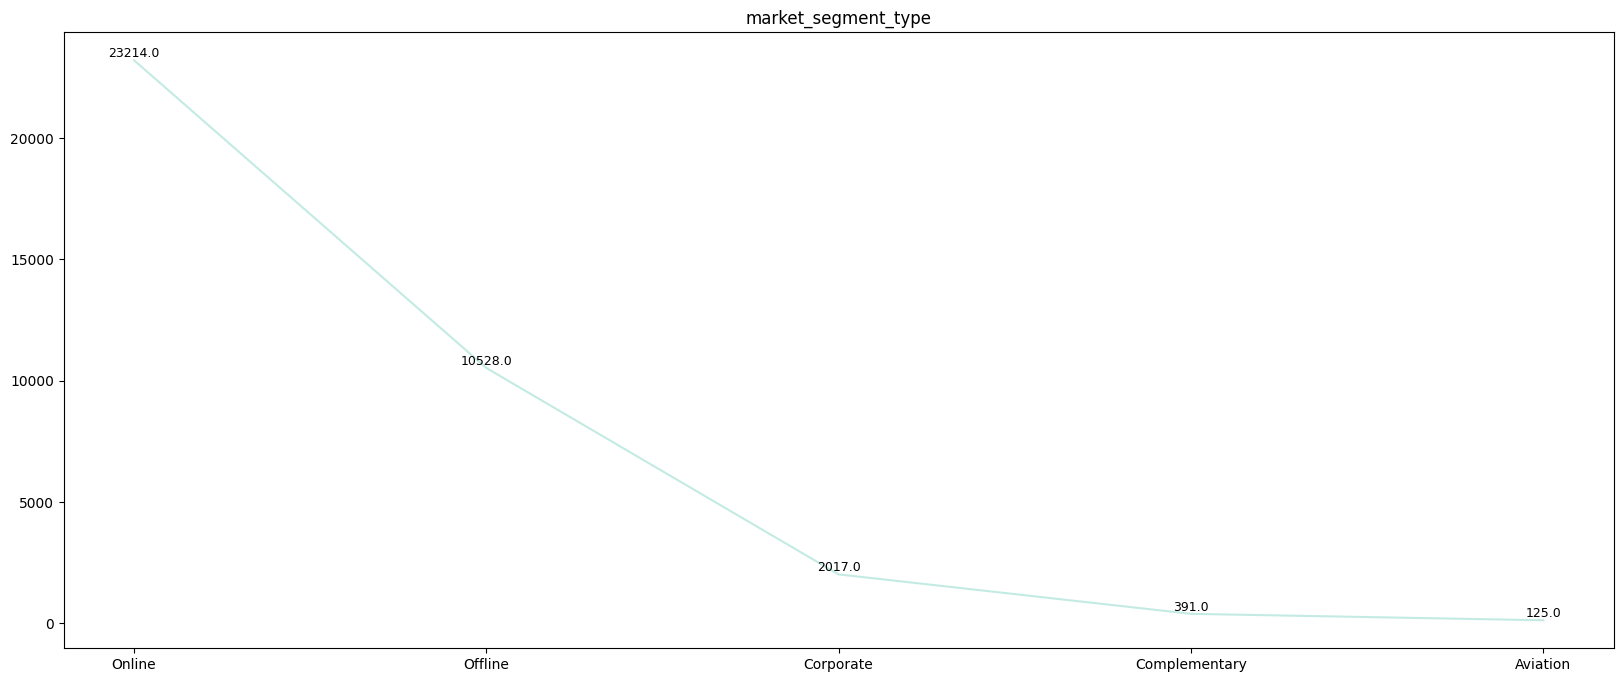

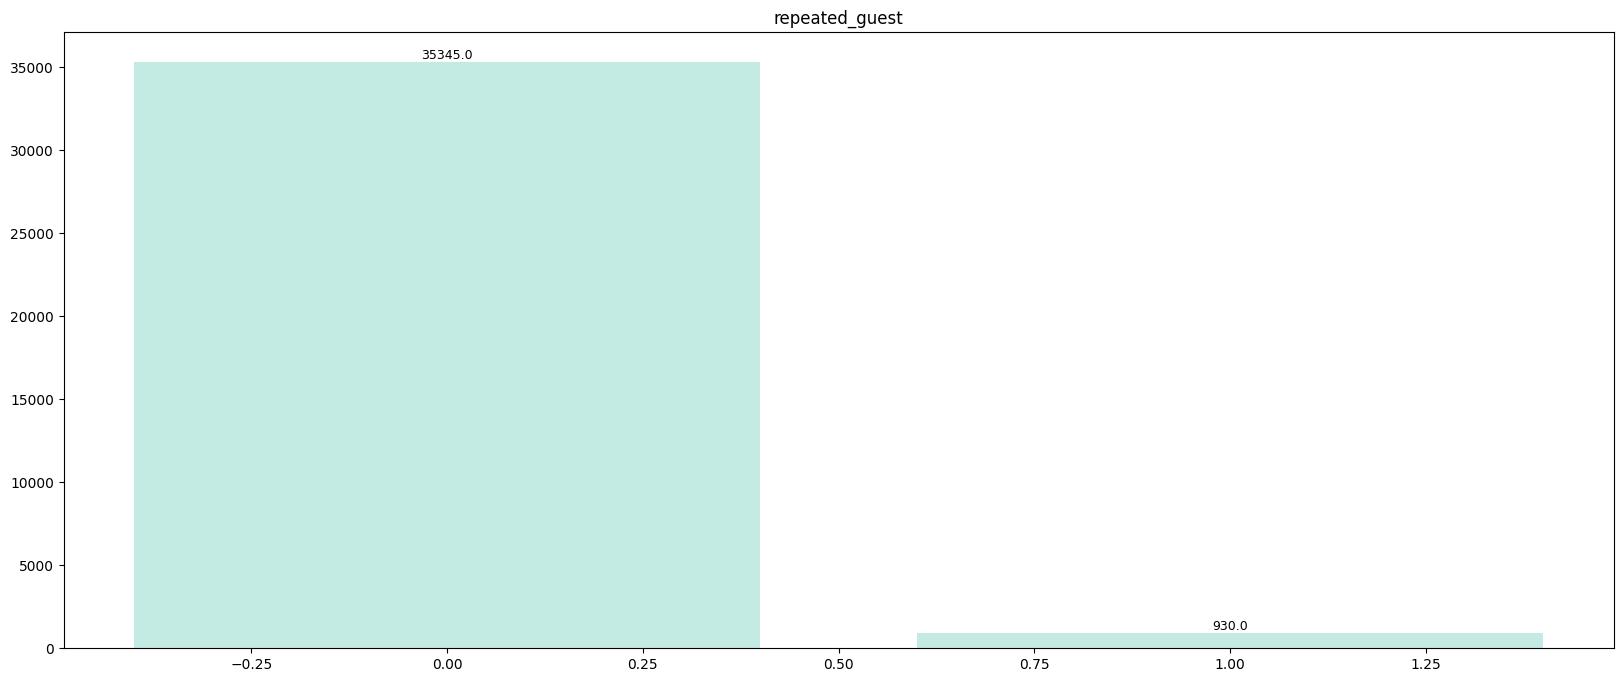

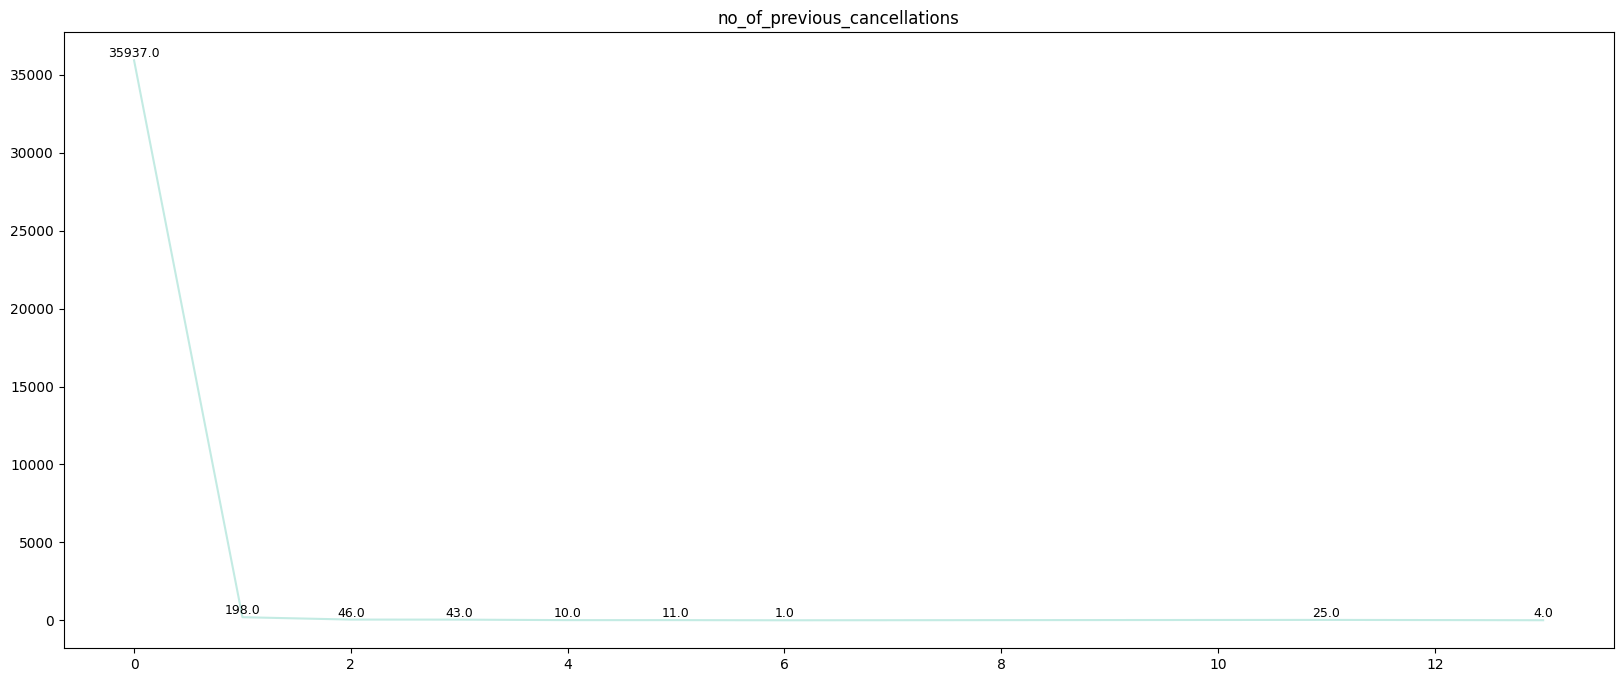

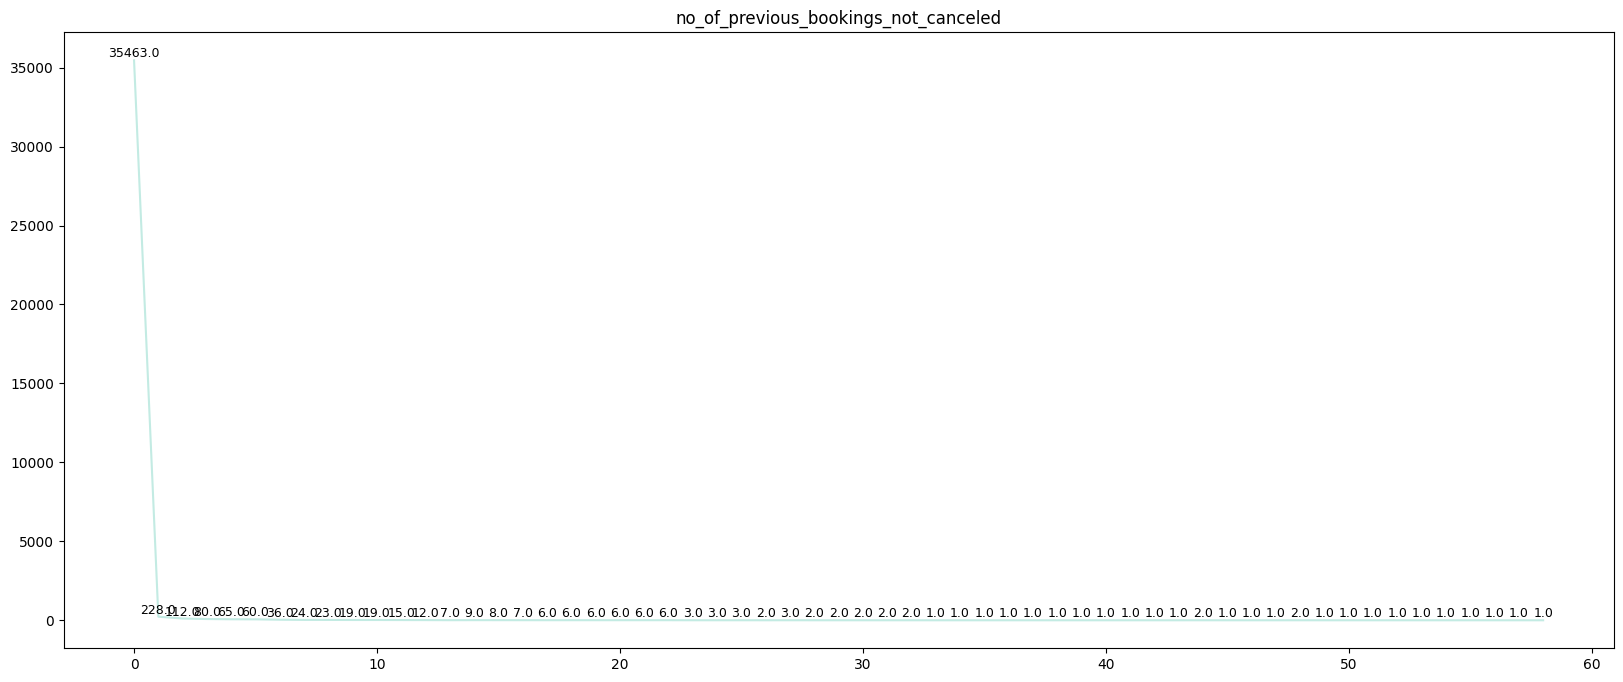

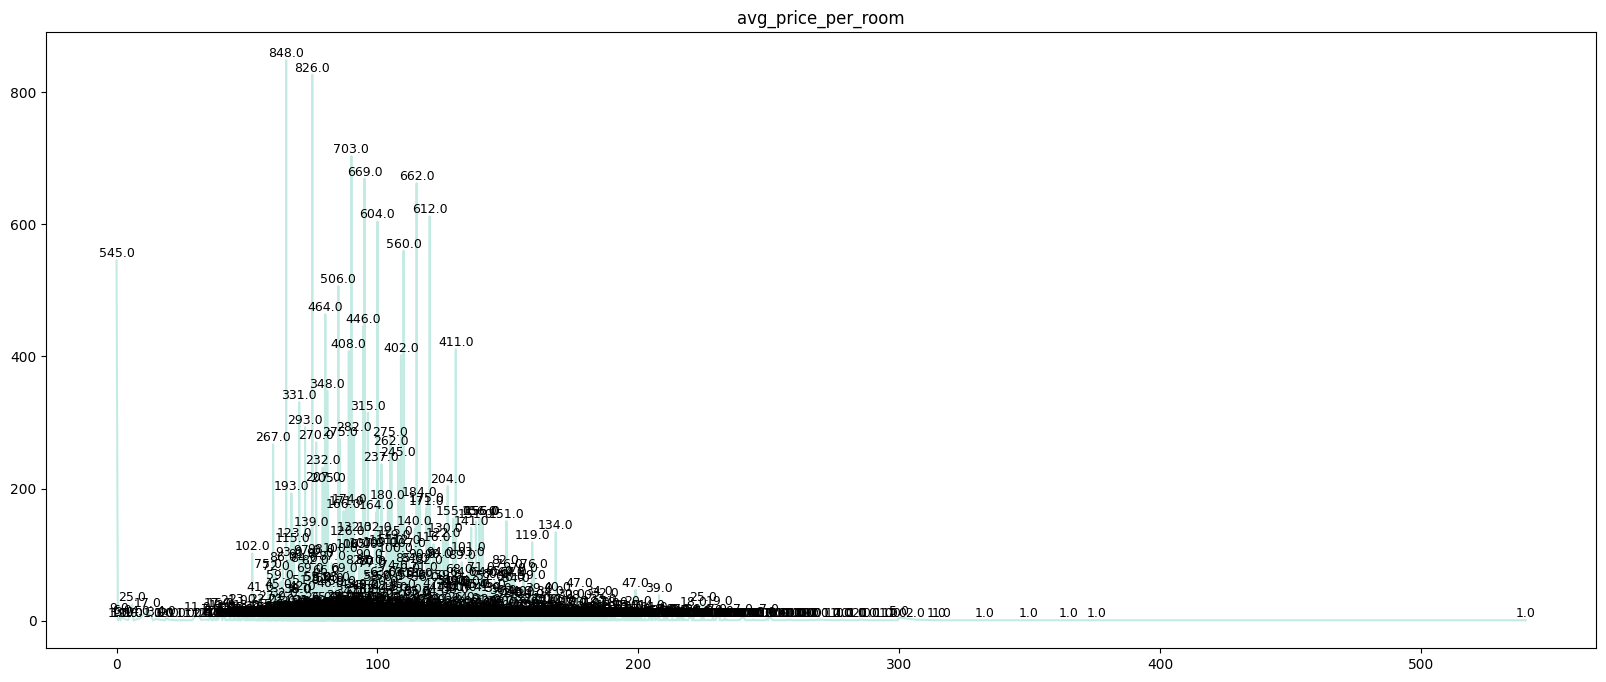

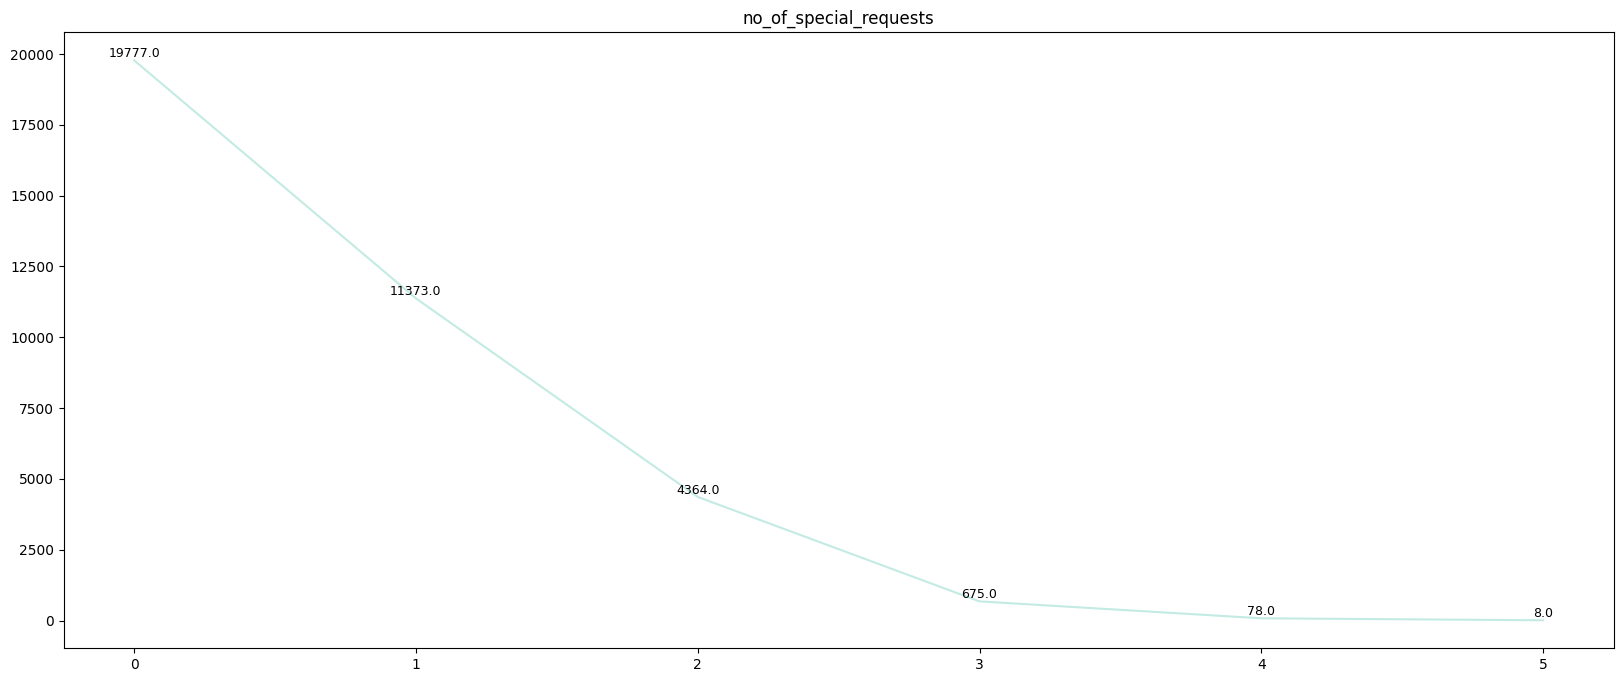

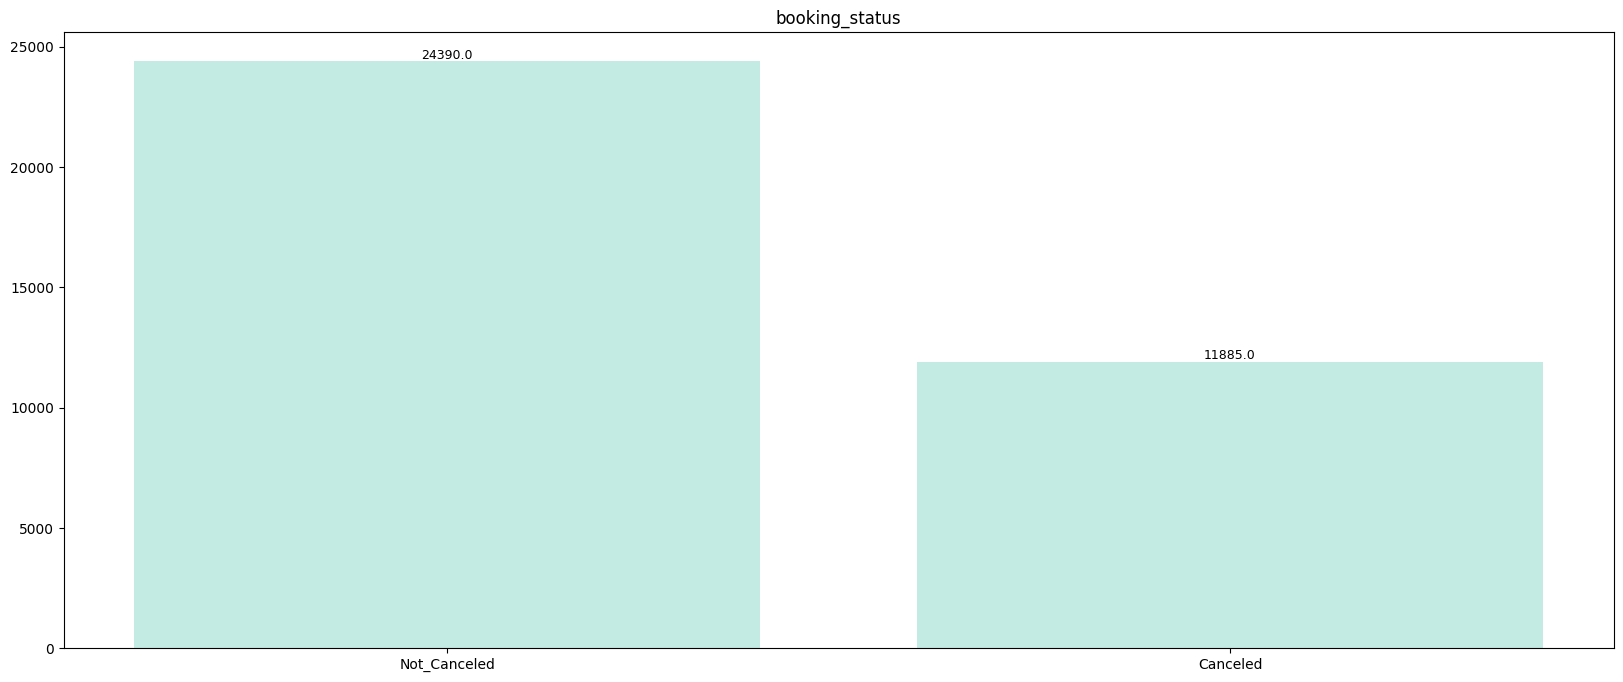

In [16]:
for i in data.columns[1:]:
    make_bar_graph(i)

# **4. Pretraitement des données**


1. Suppression des vriables inutiles.
2. Normalisation/Standardisation.
3. Encodage de variables catégorielles en -1 et +1.
4. Séparation de la target des Features.







#### Suppression des variables inutiles

In [17]:
#drop unecesery columns
data = data.drop(columns=['Booking_ID','arrival_year','avg_price_per_room'])
print("Colonnes après suppression :", data.columns)

# Identifier les colonnes catégorielles (type 'object')
categorical_columns = data.select_dtypes(include=['object']).columns
print("Colonnes catégorielles :", categorical_columns)
print(data.shape)

Colonnes après suppression : Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status'],
      dtype='object')
Colonnes catégorielles : Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')
(36275, 16)


In [18]:
data.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_month,int64
arrival_date,int64


#### Normalisations des colonnes *numériques*

In [19]:
# Normalisation des données
num_col = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
numerical_data  = data[num_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_data)

### Encodage des variables catégorielles

In [20]:
# Sélection des colonnes à encoder
columns_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status', 'arrival_month']

# Appliquer One-Hot Encoding uniquement sur les colonnes spécifiées
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Afficher les premières lignes du DataFrame encodé
print(data_encoded.head())
print(data_encoded.columns)
print(data_encoded.shape)

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                           0        224             2               0   
1                           0          5             6               0   
2                           0          1            28               0   
3                           0        211            20               0   
4                           0         48            11               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  ...  \
0                   

##### convertir True et False en 1 et -1

In [21]:
# Assuming 'data_encoded' is your DataFrame with one-hot encoded columns

# Get a list of columns that were one-hot encoded
encoded_columns = [col for col in data_encoded.columns if any(prefix in col for prefix in columns_to_encode)]

# Replace True with 1 and False with -1 in the encoded columns
for column in encoded_columns:
    data_encoded[column] = data_encoded[column].replace({True: 1, False: -1})

# Now your encoded columns in 'data_encoded' will have 1 and -1 instead of True/False
print(data_encoded.head())
print(data.columns)
print(data.shape)

<ipython-input-21-a12c48248949>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[column] = data_encoded[column].replace({True: 1, False: -1})


   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                           0        224             2               0   
1                           0          5             6               0   
2                           0          1            28               0   
3                           0        211            20               0   
4                           0         48            11               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  ...  \
0                   

##### convertir 0 en -1 pour variables catégorielles

In [22]:
# Colonnes spécifiques à modifier
columns_to_modify = ['required_car_parking_space', 'repeated_guest']

# Remplacement des valeurs : 0 devient -1, 1 reste 1
for column in columns_to_modify:
    if column in data_encoded.columns:  # Vérifie si la colonne existe dans le DataFrame
        data_encoded[column] = data_encoded[column].replace({0: -1, 1: 1})
    else:
        print(f"La colonne {column} n'existe pas dans le DataFrame.")

# Vérification
print('columns encoded',data_encoded[columns_to_modify].head())

print('data encoded',data_encoded.head())
print(data_encoded.columns)
print(data_encoded.shape)

columns encoded    required_car_parking_space  repeated_guest
0                          -1              -1
1                          -1              -1
2                          -1              -1
3                          -1              -1
4                          -1              -1
data encoded    no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                          -1        224             2              -1   
1                          -1          5             6              -1   
2               

##### Créer New_data

In [23]:
New_data = data_encoded.copy()
print(New_data.shape)
print(New_data.dtypes)

(36275, 36)
no_of_adults                            int64
no_of_children                          int64
no_of_weekend_nights                    int64
no_of_week_nights                       int64
required_car_parking_space              int64
lead_time                               int64
arrival_date                            int64
repeated_guest                          int64
no_of_previous_cancellations            int64
no_of_previous_bookings_not_canceled    int64
no_of_special_requests                  int64
type_of_meal_plan_Meal Plan 2           int64
type_of_meal_plan_Meal Plan 3           int64
type_of_meal_plan_Not Selected          int64
room_type_reserved_Room_Type 2          int64
room_type_reserved_Room_Type 3          int64
room_type_reserved_Room_Type 4          int64
room_type_reserved_Room_Type 5          int64
room_type_reserved_Room_Type 6          int64
room_type_reserved_Room_Type 7          int64
market_segment_type_Complementary       int64
market_segment_type_Co

### Séparation de la variable cible des variables Featues

In [24]:
# Définir les caractéristiques (features) et la cible (target)
X = New_data.drop(columns=['booking_status_Not_Canceled'])  # Retirer la colonne cible
y = New_data['booking_status_Not_Canceled']  # Colonne cible encodée


# **5. Split data**

Division des données en ensembles d’entraînement et de test avec train_test_split de sklearn.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **6. XGboost**

In [70]:
# Affichage des paramètres du modèle de régression logistique
#print(xgb_model.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      3607
           1       0.82      0.93      0.87      7276

    accuracy                           0.82     10883
   macro avg       0.81      0.76      0.77     10883
weighted avg       0.81      0.82      0.81     10883



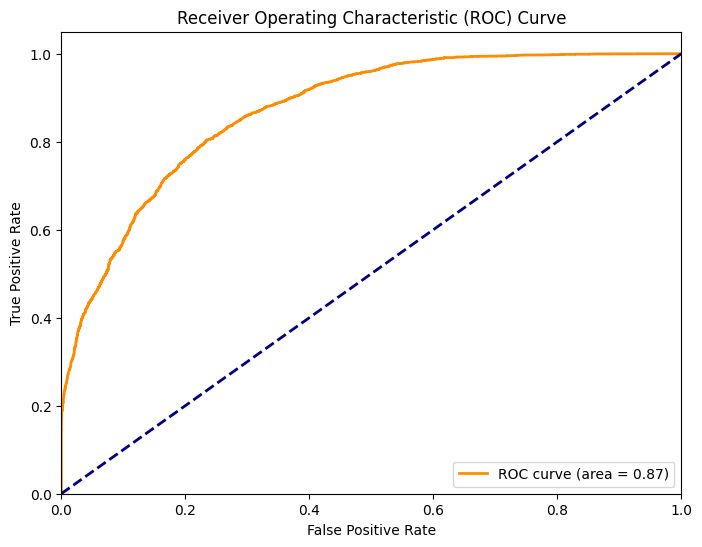

AUC: 0.87


In [69]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Replace -1 with 0 in y_train and y_test
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)

# Initialiser le modèle
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred = xgb_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")


# **7. Deploiment de XGboost**